## Klasifikasi Nilai Akhir Siswa SMA

### **Masalah**

Prestasi akademik siswa merupakan indikator penting dalam sistem pendidikan yang mempengaruhi masa depan dan peluang karir mereka. Faktor-faktor yang mempengaruhi prestasi akademik sangat kompleks dan beragam, mulai dari karakteristik demografis, kebiasaan belajar, dukungan orang tua, hingga partisipasi dalam aktivitas ekstrakurikuler. Identifikasi dini siswa yang berisiko mendapat prestasi rendah (grade D atau F) sangat krusial untuk memberikan intervensi yang tepat waktu, seperti program tutoring tambahan, konseling akademik, atau dukungan psikososial. Sayangnya, proses identifikasi ini masih sering dilakukan secara manual dan subjektif oleh guru dan konselor, yang rentan terhadap bias dan keterlambatan deteksi. Dengan demikian, notebook ini berupaya mengotomatisasi masalah prediksi prestasi akademik siswa menggunakan machine learning untuk membantu institusi pendidikan dalam mengalokasikan sumber daya dengan lebih efektif dan memberikan dukungan yang tepat sasaran kepada siswa

### **Tujuan** 

Mengklasifikasikan prestasi akademik siswa berdasarkan attribut dari dataset.

### **Attribut Dataset**

Dataset ini berisi 2392 record siswa SMA dengan 15 atribut yang mencakup berbagai aspek kehidupan akademik dan personal siswa. Berikut penjelasan setiap atribut:

**Identifikasi Siswa:**
- **StudentID**: Identifier unik untuk setiap siswa (range: 1001-3392)

**Karakteristik Demografis:**
- **Age**: Usia siswa dalam tahun (range: 15-18 tahun)
- **Gender**: Jenis kelamin siswa (Male/Female)
- **Ethnicity**: Latar belakang etnis siswa (Caucasian, African American, Asian, Other)

**Latar Belakang Keluarga:**
- **ParentalEducation**: Tingkat pendidikan orang tua (None, High School, Some College, Bachelor's, Higher)
- **ParentalSupport**: Tingkat dukungan orang tua terhadap pendidikan (None, Low, Moderate, High, Very High)

**Kebiasaan Belajar:**
- **StudyTimeWeekly**: Waktu belajar per minggu dalam jam (range: 0-20 jam)
- **Absences**: Jumlah ketidakhadiran selama tahun ajaran (range: 0-30 hari)
- **Tutoring**: Status mengikuti bimbingan belajar tambahan (Yes/No)

**Aktivitas Ekstrakurikuler:**
- **Extracurricular**: Partisipasi dalam kegiatan ekstrakurikuler (Yes/No)
- **Sports**: Partisipasi dalam kegiatan olahraga (Yes/No)
- **Music**: Partisipasi dalam kegiatan musik (Yes/No)
- **Volunteering**: Partisipasi dalam kegiatan volunteering (Yes/No)

**Prestasi Akademik:**
- **GPA**: Grade Point Average pada skala 2.0-4.0
- **GradeClass**: Klasifikasi prestasi akademik berdasarkan GPA (A: ≥3.5, B: 3.0-3.4, C: 2.5-2.9, D: 2.0-2.4, F: <2.0)

## EDA

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [112]:
df = pd.read_csv('../dataset/Student_corrected.csv')

In [113]:
df.head(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Female,Caucasian,Some College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,C
1,1002,18,Male,Caucasian,High School,15.408756,0,No,Low,No,No,No,No,3.042915,B
2,1003,15,Male,Asian,Bachelor's,4.210570,26,No,Moderate,No,No,No,No,0.112602,F
3,1004,17,Female,Caucasian,Bachelor's,10.028829,14,No,High,Yes,No,No,No,2.054218,D
4,1005,17,Female,Caucasian,Some College,4.672495,17,Yes,High,No,No,No,No,1.288061,F


In [114]:
print("=== STUDENT DATASET INFORMATION ===")
print(f"Dataset Shape: {df.shape}")
print(f"Total Students: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")
print()
print("=== DATASET COLUMNS ===")
print(df.columns.tolist())

=== STUDENT DATASET INFORMATION ===
Dataset Shape: (2392, 15)
Total Students: 2392
Total Features: 15

=== DATASET COLUMNS ===
['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass']


In [115]:
df.info()
numerical_features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
categorical_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport', 
                       'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   object 
 3   Ethnicity          2392 non-null   object 
 4   ParentalEducation  2149 non-null   object 
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   object 
 8   ParentalSupport    2180 non-null   object 
 9   Extracurricular    2392 non-null   object 
 10  Sports             2392 non-null   object 
 11  Music              2392 non-null   object 
 12  Volunteering       2392 non-null   object 
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 280.4+ KB


In [116]:
print("\n=== FITUR NUMERIK ===")
df[numerical_features].describe().T


=== FITUR NUMERIK ===


,count,mean,std,min,25%,50%,75%,max
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
GPA,2392.0,1.906186,0.915156,0.000000,1.174803,1.893393,2.622216,4.000000


In [117]:
print("\n=== FITUR KATEGORIK ===")
df[categorical_features].describe().T


=== FITUR KATEGORIK ===


,count,unique,top,freq
Gender,2392,2,Female,1222
Ethnicity,2392,4,Caucasian,1207
ParentalEducation,2149,4,Some College,934
ParentalSupport,2180,4,Moderate,740
Tutoring,2392,2,No,1671
Extracurricular,2392,2,No,1475
Sports,2392,2,No,1666
Music,2392,2,No,1921
Volunteering,2392,2,No,2016
GradeClass,2392,5,F,1274



 PERSEBARAN FITUR NUMERIK


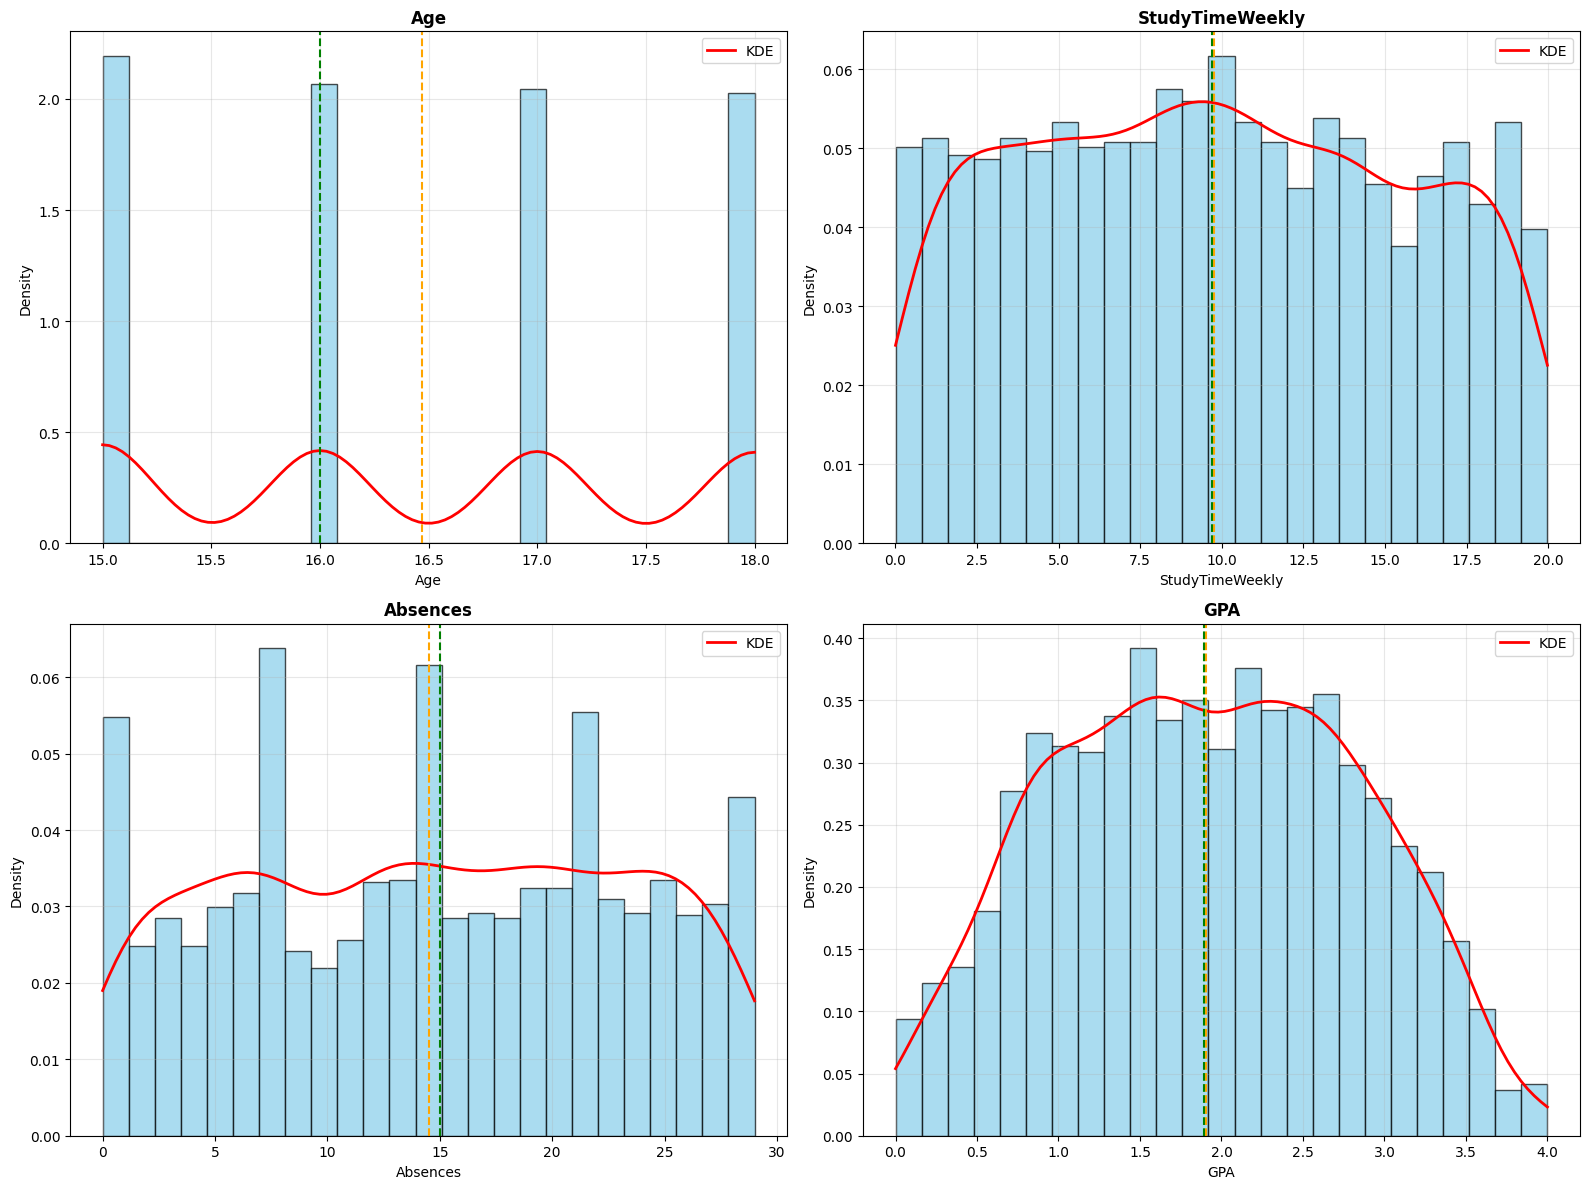

In [118]:
print("\n PERSEBARAN FITUR NUMERIK")
print("=" * 40)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    axes[i].hist(df[feature], bins=25, alpha=0.7, density=True, color='skyblue', edgecolor='black')

    x = np.linspace(df[feature].min(), df[feature].max(), 100)
    kde = stats.gaussian_kde(df[feature])
    axes[i].plot(x, kde(x), 'r-', linewidth=2, label='KDE')
    
    axes[i].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()
    
    # Stats
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    axes[i].axvline(mean_val, color='orange', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')

plt.tight_layout()
plt.show()


 PERSEBARAN FITUR KATEGORIKAL


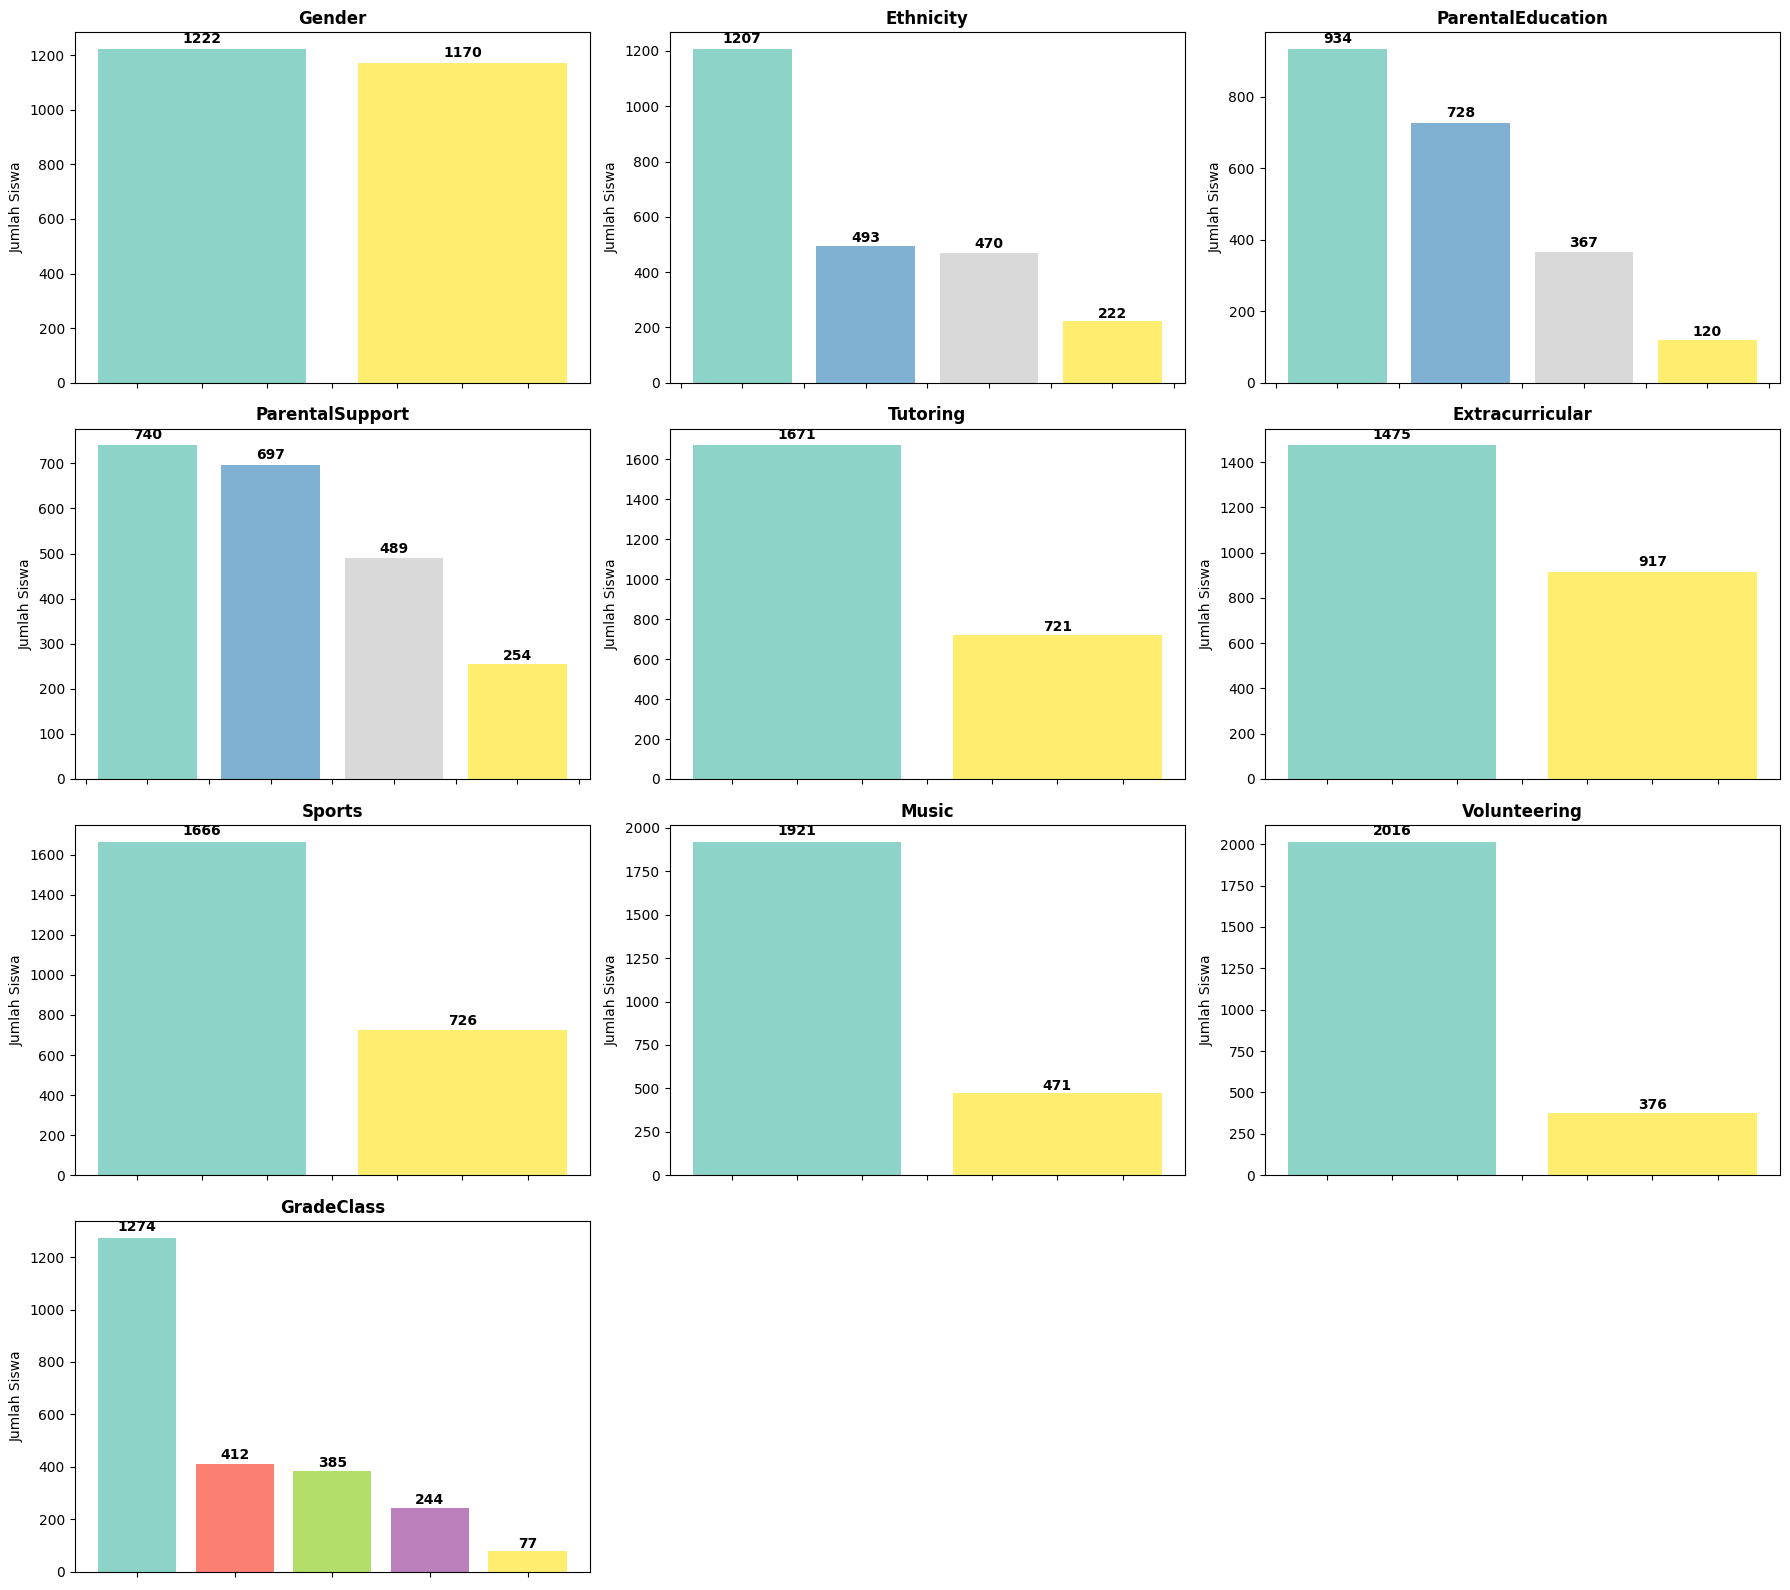

In [139]:
print("\n PERSEBARAN FITUR KATEGORIKAL")
print("=" * 40)

n_categorical = len(categorical_features)
n_cols = 3
n_rows = (n_categorical + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    value_counts = df[feature].value_counts()
    
    # Bar plot
    bars = axes[i].bar(range(len(value_counts)), value_counts.values, 
                      color=plt.cm.Set3(np.linspace(0, 1, len(value_counts))))
    
    axes[i].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Jumlah Siswa')
    axes[i].set_xticklabels([])
    

    # Menambahkan nilai diatas bar
    for j, bar in enumerate(bars):
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Hapus subplot kosong 
for i in range(n_categorical, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

=== GRADE CLASS DISTRIBUTION ===
Grade Class Counts:
------------------------------
Grade A:   77 students (  3.2%)
Grade B:  244 students ( 10.2%)
Grade C:  385 students ( 16.1%)
Grade D:  412 students ( 17.2%)
Grade F: 1274 students ( 53.3%)
------------------------------
Total:   2392 students (100.0%)


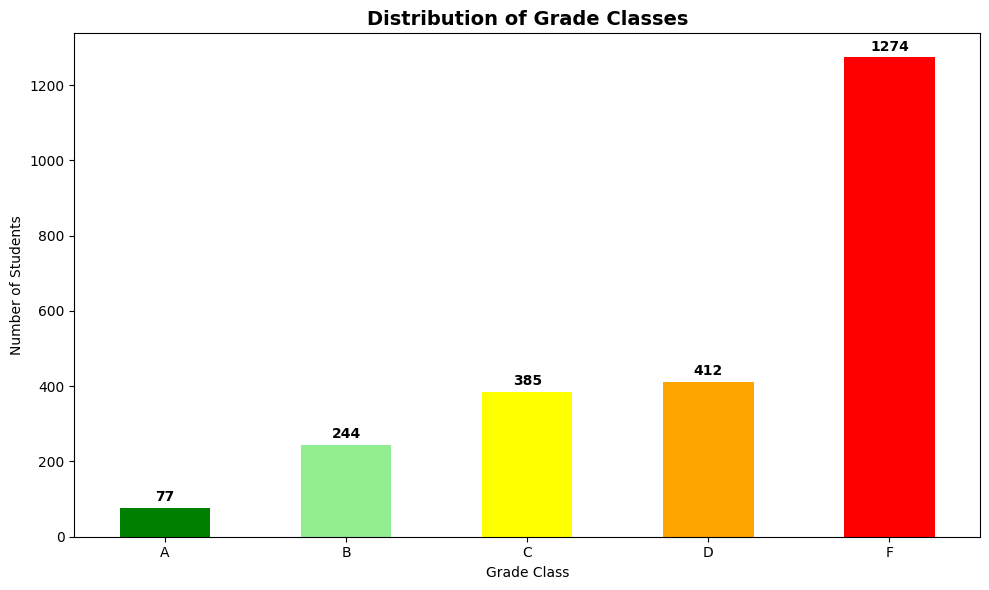

In [120]:
# Count untuk masing-masing Grade Class
print("=== GRADE CLASS DISTRIBUTION ===")

grade_counts = df['GradeClass'].value_counts().sort_index()
total_students = len(df)

print("Grade Class Counts:")
print("-" * 30)
for grade in ['A', 'B', 'C', 'D', 'F']:
    count = grade_counts.get(grade, 0)
    percentage = (count/total_students)*100
    print(f"Grade {grade}: {count:4d} students ({percentage:5.1f}%)")

print("-" * 30)
print(f"Total:   {total_students:4d} students (100.0%)")

# Visualisasi
plt.figure(figsize=(10, 6))
grade_counts.plot(kind='bar', color=['green', 'lightgreen', 'yellow', 'orange', 'red'])
plt.title('Distribution of Grade Classes', fontsize=14, fontweight='bold')
plt.xlabel('Grade Class')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
for i, v in enumerate(grade_counts.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## Null Values

<Axes: >

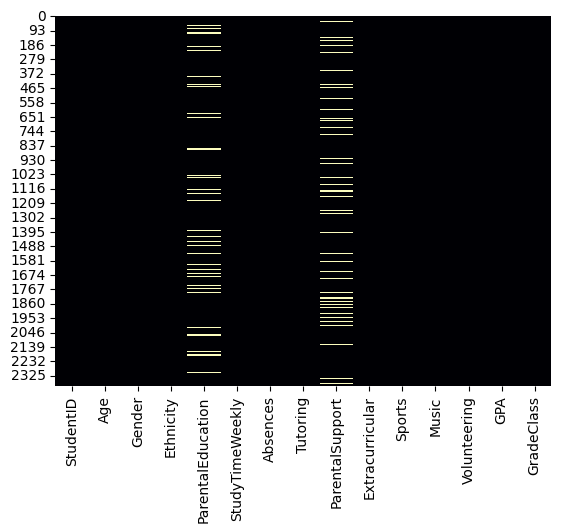

In [121]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False)